# CASE STUDY:DATA EXPLORATORY ANALYSIS AND HYPOTHESIS TESTING FOR INSURANCE CLAIMS DATA¶

### 1.Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
claims= pd.read_csv("C:\ANALAYTIX LABS\PYTHON\PROJECT4 INSURANCE CLAIMS\claims.csv")
cust= pd.read_csv("C:\ANALAYTIX LABS\PYTHON\PROJECT4 INSURANCE CLAIMS\cust_demographics.csv")

In [3]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,"$2,980",1.0,No
1,33985796,75740424,Crime,10/3/2018,Home,Unknown,Material only,"$2,980",3.0,No
2,53522022,30308357,Other driver error,2/2/2018,Auto,No,Material only,"$3,369.50",1.0,Yes
3,13015401,47830476,Natural causes,6/17/2018,Auto,No,Material only,"$1,680",1.0,No
4,22890252,19269962,Crime,1/13/2018,Auto,No,Material only,"$2,680",1.0,No


In [4]:
cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,1-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [5]:
merged_c_c= pd.merge(right = claims,left = cust, right_on = "customer_id", left_on = "CUST_ID",how = "inner")
merged_c_c.drop(columns = ["customer_id"], inplace = True)
merged_c_c.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,"$2,980",1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/3/2018,Home,Unknown,Material only,"$2,980",3.0,No


In [6]:
merged_c_c.shape

(1085, 15)

In [7]:
merged_c_c.isna().count()

CUST_ID                1085
gender                 1085
DateOfBirth            1085
State                  1085
Contact                1085
Segment                1085
claim_id               1085
incident_cause         1085
claim_date             1085
claim_area             1085
police_report          1085
claim_type             1085
claim_amount           1085
total_policy_claims    1085
fraudulent             1085
dtype: int64

### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance¶

In [8]:
merged_c_c.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,"$2,980",1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/3/2018,Home,Unknown,Material only,"$2,980",3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,2/2/2018,Auto,No,Material only,"$3,369.50",1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,4/4/2018,Auto,No,Material only,"$1,950",6.0,No
4,47830476,Female,1-May-86,MA,413-187-7945,Silver,13015401,Natural causes,6/17/2018,Auto,No,Material only,"$1,680",1.0,No


In [9]:
merged_c_c["DateOfBirth"] = pd.to_datetime(merged_c_c.DateOfBirth, format = "%d-%b-%y")
merged_c_c.loc[(merged_c_c.DateOfBirth.dt.year > 2020),"DateOfBirth"]=merged_c_c[merged_c_c.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))
merged_c_c["DateOfBirth"]

0      1979-01-12
1      1970-01-13
2      1984-03-11
3      1984-03-11
4      1986-05-01
          ...    
1080   1981-03-15
1081   1996-07-07
1082   1990-04-11
1083   1964-10-22
1084   1995-07-12
Name: DateOfBirth, Length: 1085, dtype: datetime64[ns]

In [10]:
merged_c_c["claim_date"] = pd.to_datetime(merged_c_c.claim_date, format = "%m/%d/%Y")
merged_c_c["claim_date"].head()

0   2017-11-27
1   2018-10-03
2   2018-02-02
3   2018-04-04
4   2018-06-17
Name: claim_date, dtype: datetime64[ns]

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [11]:
merged_c_c["claim_amount"]=merged_c_c["claim_amount"].apply(lambda x:str(x).replace("$",""))
merged_c_c["claim_amount"].head(26)

0         2,980 
1         2,980 
2      3,369.50 
3         1,950 
4         1,680 
5         1,440 
6         2,680 
7         2,240 
8     38,306.50 
9        36,810 
10        1,730 
11        1,160 
12        2,620 
13     2,748.50 
14        1,495 
15       16,690 
16        1,870 
17        1,050 
18       32,560 
19        2,870 
20     3,208.50 
21       17,800 
22       31,380 
23       36,190 
24           nan
25        1,010 
Name: claim_amount, dtype: object

In [12]:
merged_c_c["claim_amount"]=merged_c_c["claim_amount"].apply(lambda x:str(x).replace(",",""))
merged_c_c["claim_amount"].head(26)

0         2980 
1         2980 
2      3369.50 
3         1950 
4         1680 
5         1440 
6         2680 
7         2240 
8     38306.50 
9        36810 
10        1730 
11        1160 
12        2620 
13     2748.50 
14        1495 
15       16690 
16        1870 
17        1050 
18       32560 
19        2870 
20     3208.50 
21       17800 
22       31380 
23       36190 
24          nan
25        1010 
Name: claim_amount, dtype: object

In [18]:
merged_c_c['claim_amount']=merged_c_c['claim_amount'].fillna(0)
merged_c_c["claim_amount"].head(26)

0         2980 
1         2980 
2      3369.50 
3         1950 
4         1680 
5         1440 
6         2680 
7         2240 
8     38306.50 
9        36810 
10        1730 
11        1160 
12        2620 
13     2748.50 
14        1495 
15       16690 
16        1870 
17        1050 
18       32560 
19        2870 
20     3208.50 
21       17800 
22       31380 
23       36190 
24             
25        1010 
Name: claim_amount, dtype: object

In [21]:
merged_c_c['claim_amount'] = pd.to_numeric(merged_c_c['claim_amount']).fillna(0)
merged_c_c['claim_amount'].head(26)

0      2980.0
1      2980.0
2      3369.5
3      1950.0
4      1680.0
5      1440.0
6      2680.0
7      2240.0
8     38306.5
9     36810.0
10     1730.0
11     1160.0
12     2620.0
13     2748.5
14     1495.0
15    16690.0
16     1870.0
17     1050.0
18    32560.0
19     2870.0
20     3208.5
21    17800.0
22    31380.0
23    36190.0
24        0.0
25     1010.0
Name: claim_amount, dtype: float64

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [22]:
merged_c_c['unreported']= np.where(merged_c_c.police_report== 'Unknown',1,0)
merged_c_c['unreported'].head(26)

0     0
1     1
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     1
10    0
11    0
12    1
13    0
14    0
15    1
16    1
17    1
18    0
19    0
20    1
21    0
22    0
23    0
24    0
25    0
Name: unreported, dtype: int32

### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique.¶

In [23]:
merged_c_c=merged_c_c.drop_duplicates(subset=["CUST_ID"], keep= "last")
merged_c_c


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
5,47830476,Female,1986-05-01,MA,413-187-7945,Silver,91609100,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,1
7,19269962,Male,1977-05-13,NV,956-871-8691,Gold,39219616,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,0
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,0
1083,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical) 

In [24]:
merged_c_c.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims    10
fraudulent              0
unreported              0
dtype: int64

In [25]:
merged_c_c["claim_amount"]= merged_c_c['claim_amount'].replace(np.NaN,merged_c_c['claim_amount'].mean())
merged_c_c["claim_amount"].isna().sum()


0

In [26]:
merged_c_c.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1078 non-null   int64         
 1   gender               1078 non-null   object        
 2   DateOfBirth          1078 non-null   datetime64[ns]
 3   State                1078 non-null   object        
 4   Contact              1078 non-null   object        
 5   Segment              1078 non-null   object        
 6   claim_id             1078 non-null   int64         
 7   incident_cause       1078 non-null   object        
 8   claim_date           1078 non-null   datetime64[ns]
 9   claim_area           1078 non-null   object        
 10  police_report        1078 non-null   object        
 11  claim_type           1078 non-null   object        
 12  claim_amount         1078 non-null   float64       
 13  total_policy_claims  1068 non-nul

In [29]:
merged_c_c["total_policy_claims"] = merged_c_c['total_policy_claims'].fillna(merged_c_c['total_policy_claims'].mode()[0])
merged_c_c["total_policy_claims"] .head(26)


0     1.0
1     3.0
3     6.0
5     1.0
7     2.0
9     1.0
10    4.0
11    3.0
12    1.0
13    2.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
Name: total_policy_claims, dtype: float64

In [30]:
merged_c_c["total_policy_claims"] = merged_c_c["total_policy_claims"] .astype(str)
merged_c_c["total_policy_claims"].head(26) 

0     1.0
1     3.0
3     6.0
5     1.0
7     2.0
9     1.0
10    4.0
11    3.0
12    1.0
13    2.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
Name: total_policy_claims, dtype: object

In [31]:
merged_c_c["total_policy_claims"].isna().sum()


0

### 7. Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteria : Children < 18 Youth 18-30 Adult 30-60 Senior > 60

In [32]:
current_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(merged_c_c['DateOfBirth']).year          
x = dob_year-100                                               
v =current_year - x
y = current_year- dob_year
merged_c_c['age'] = (np.where(dob_year > current_year,v,y))

merged_c_c.loc[(merged_c_c.age < 18),'AgeGroup'] = 'Children'
merged_c_c.loc[(merged_c_c.age >=18) & (merged_c_c.age <30),'AgeGroup'] = 'Youth'
merged_c_c.loc[(merged_c_c.age >=30) & (merged_c_c.age <60),'AgeGroup'] = 'Adult'
merged_c_c.loc[(merged_c_c.age >=60),'AgeGroup'] = 'Senior'
merged_c_c.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported,age,AgeGroup
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,43,Adult
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1,52,Adult
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0,38,Adult
5,47830476,Female,1986-05-01,MA,413-187-7945,Silver,91609100,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,1,36,Adult
7,19269962,Male,1977-05-13,NV,956-871-8691,Gold,39219616,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,0,45,Adult


In [33]:
merged_c_c.groupby(["AgeGroup"])["age"].count()

AgeGroup
Adult     795
Senior     75
Youth     208
Name: age, dtype: int64

### 8. What is the average amount claimed by the customers from various segments?

In [34]:
Avg= round(merged_c_c.groupby(["Segment"])["claim_amount"].mean(),2)
Avg

Segment
Gold        12105.06
Platinum    11852.19
Silver      11255.47
Name: claim_amount, dtype: float64

In [36]:
#pivot looks
#merged_c_c.groupby(by="Segment")[["claim_amount"]].mean()

### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [37]:
merged_c_c.loc[merged_c_c.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_")

incident_cause
total_Crime                  659430.0
total_Driver error          3165830.0
total_Natural causes        1200231.5
total_Other causes          3485619.0
total_Other driver error    3115014.0
Name: claim_amount, dtype: float64

### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [38]:
merged_c_c.loc[(merged_c_c.incident_cause.str.lower().str.contains("driver")  & ((merged_c_c.State == "TX") | (merged_c_c.State == "DE") | (merged_c_c.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

In [39]:
merged_c_c.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'unreported', 'age', 'AgeGroup'],
      dtype='object')

In [40]:
merged_c_c.loc[(merged_c_c.incident_cause.str.lower().str.contains("driver") & (merged_c_c.State== "TX") | (merged_c_c.State== "DE") | (merged_c_c.State== "AK")) ].groupby(["State"])["claim_amount"].count()

State
AK    19
DE    29
TX    10
Name: claim_amount, dtype: int64

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [41]:
gender_segment= round(merged_c_c.groupby(["Segment", "gender"])["claim_amount"].sum().reset_index(),2)
gender_segment


,Segment,gender,claim_amount
0,Gold,Female,1997529.0
1,Gold,Male,2493447.5
2,Platinum,Female,2282210.0
3,Platinum,Male,1996431.5
4,Silver,Female,1734782.5
5,Silver,Male,2159608.5


In [42]:
gender_segment_pivot=gender_segment.pivot(index="Segment", columns= "gender", values= "claim_amount")
gender_segment_pivot


gender,Female,Male
Segment,,
Gold,1997529.0,2493447.5
Platinum,2282210.0,1996431.5
Silver,1734782.5,2159608.5


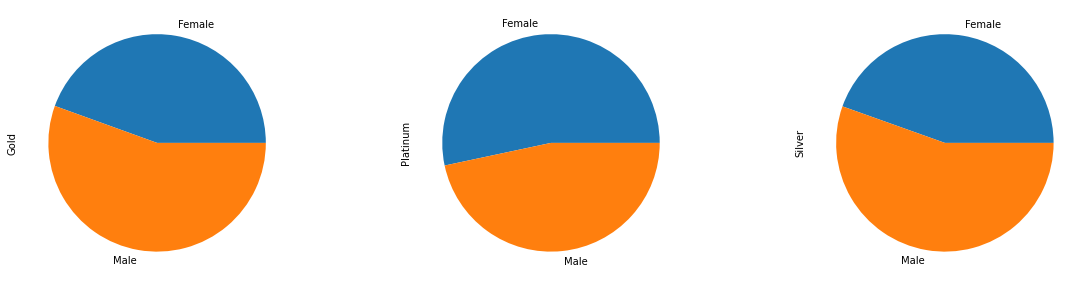

In [45]:
gender_segment_pivot.T.plot(kind="pie", subplots= True, legend= False,figsize=(20,5))
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart¶

In [46]:
a = merged_c_c.loc[(merged_c_c.incident_cause.str.lower().str.contains("driver"))].groupby(by = "gender")[["gender"]].count().add_prefix("CountOf_").reset_index()
a

,gender,CountOf_gender
0,Female,221
1,Male,281


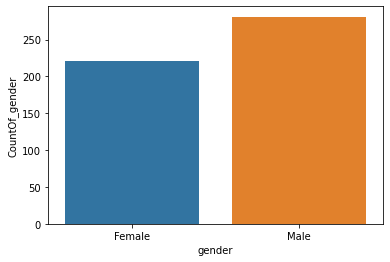

In [47]:
sns.barplot(x = "gender", y = "CountOf_gender", data=a )
plt.show()


### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [48]:
merged_c_c.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported,age,AgeGroup
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,43,Adult
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1,52,Adult
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0,38,Adult
5,47830476,Female,1986-05-01,MA,413-187-7945,Silver,91609100,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,1,36,Adult
7,19269962,Male,1977-05-13,NV,956-871-8691,Gold,39219616,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,0,45,Adult


In [50]:
merged_c_c["Frauds"]= np.where(merged_c_c.fraudulent == "Yes",1,0)
merged_c_c["Frauds"]

0       0
1       0
3       0
5       0
7       0
       ..
1080    0
1081    0
1082    0
1083    0
1084    0
Name: Frauds, Length: 1078, dtype: int32

In [51]:
max_frauds= merged_c_c.groupby(["AgeGroup"])["Frauds"].sum().reset_index()
max_frauds

,AgeGroup,Frauds
0,Adult,185
1,Senior,21
2,Youth,39


[]

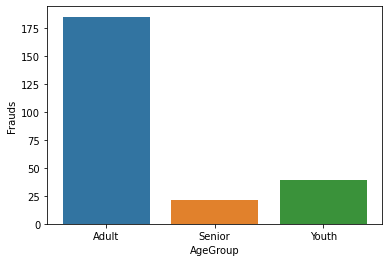

In [53]:
sns.barplot(x= "AgeGroup", y="Frauds", data=max_frauds )
plt.plot()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [54]:
merged_c_c['claim_month'] = pd.to_datetime(merged_c_c['claim_date'])
merged_c_c['Claim_month'] = merged_c_c['claim_month'].dt.month
merged_c_c['Claim_month']

0       11
1       10
3        4
5        4
7        9
        ..
1080     9
1081     5
1082     5
1083     4
1084     3
Name: Claim_month, Length: 1078, dtype: int64

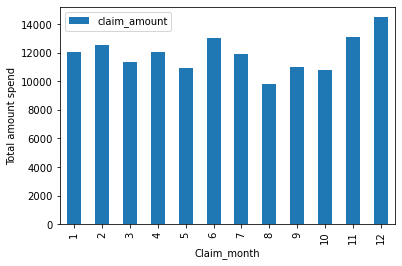

In [55]:
pd.pivot_table(merged_c_c,index="Claim_month",values="claim_amount").plot(kind='bar')
plt.ylabel('Total amount spend')
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [56]:
Frauders= pd.DataFrame(merged_c_c.loc[(merged_c_c.fraudulent=="Yes")].groupby(["gender","AgeGroup"])[["claim_amount"]].mean().add_prefix("Frauders_"))
Non_Frauders=pd.DataFrame(merged_c_c.loc[(merged_c_c.fraudulent=="No")].groupby(["gender","AgeGroup"])[["claim_amount"]].mean().add_prefix("Non_Frauders_"))

In [57]:
Claims_gender=round(pd.merge(Frauders,Non_Frauders, on=["gender","AgeGroup"]),2)
Claims_gender

Frauders_claim_amount  Non_Frauders_claim_amount
gender AgeGroup                                                  
Female Adult                  11805.82                   11645.29
       Senior                  3779.08                   11840.00
       Youth                   6839.21                   12402.84
Male   Adult                  15251.20                   11536.26
       Senior                 16879.12                   11774.33
       Youth                   7105.08                   11237.16

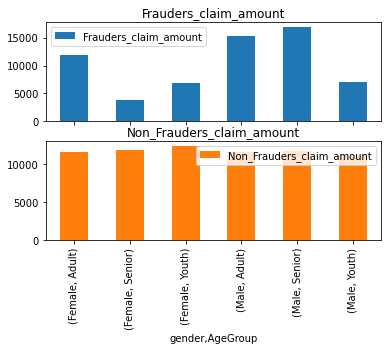

In [58]:
Claims_gender.plot(kind="bar", subplots= True, legend= True)
plt.show()

# STATS PART 

# Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.¶

### 16. Is there any similarity in the amount claimed by males and females?

### 17. Is there any relationship between age category and segment?

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

### 19. Is there any difference between age groups and insurance claims?

### 20. Is there any relationship between total number of policy claims and the claimed amount?